# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [4]:
import pandas as pd
import numpy as np

def read_california_data(file_path='california_housing_test.csv'):
    """
    Read California housing test data and show basic statistics.

    Parameters
    ----------
    file_path : str
        Path to California housing test data

    Returns
    -------
    pd.DataFrame
        The loaded dataset

    Examples
    --------
    >>> df = read_california_data('california_housing_test.csv')
    >>> isinstance(df, pd.DataFrame)
    True
    >>> df.shape[1] == 9  # Should have 9 columns
    True
    """
    # Read the data
    df = pd.read_csv(file_path)

    # Display basic information
    print("Basic Statistics:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumns in the dataset:")
    print(list(df.columns))
    print("\nFirst few rows:")
    print(df.head())

    return df

# Execute and store DataFrame for later use
df = read_california_data()

Basic Statistics:
Number of rows: 3000
Number of columns: 9

Columns in the dataset:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

First few rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359       

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [5]:
def count_unique_values(df):
    """
    Count unique values in each column and identify most diverse column.

    Parameters
    ----------
    df : pd.DataFrame
        California housing test dataset

    Returns
    -------
    tuple
        (Series of unique counts, name of most diverse column)

    Examples
    --------
    >>> test_df = pd.DataFrame({'A': [1,1,2], 'B': [1,2,3,4]})
    >>> counts, col = count_unique_values(test_df)
    >>> col == 'B'
    True
    """
    # Count unique values
    unique_counts = df.nunique()

    # Find column with most unique values
    most_diverse_col = unique_counts.idxmax()

    print("\nUnique values in each column:")
    print(unique_counts)
    print(f"\nColumn with most unique values: {most_diverse_col}")
    print(f"Number of unique values: {unique_counts[most_diverse_col]}")

    return unique_counts, most_diverse_col

# Execute analysis
unique_value_counts, diverse_column = count_unique_values(df)


Unique values in each column:
longitude              607
latitude               587
housing_median_age      52
total_rooms           2215
total_bedrooms        1055
population            1802
households            1026
median_income         2578
median_house_value    1784
dtype: int64

Column with most unique values: median_income
Number of unique values: 2578


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [6]:
def find_constant_columns(df):
    """
    Identify columns where all values are the same.

    Parameters
    ----------
    df : pd.DataFrame
        California housing test dataset

    Returns
    -------
    list
        Names of columns with constant values

    Examples
    --------
    >>> test_df = pd.DataFrame({'A': [1,1,1], 'B': [1,2,3]})
    >>> constant_cols = find_constant_columns(test_df)
    >>> 'A' in constant_cols
    True
    """
    constant_cols = []

    for column in df.columns:
        if df[column].nunique() == 1:
            constant_cols.append(column)
            print(f"Column '{column}' has constant value: {df[column].iloc[0]}")

    if not constant_cols:
        print("No columns have constant values")

    return constant_cols

# Execute analysis
redundant_columns = find_constant_columns(df)

No columns have constant values


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

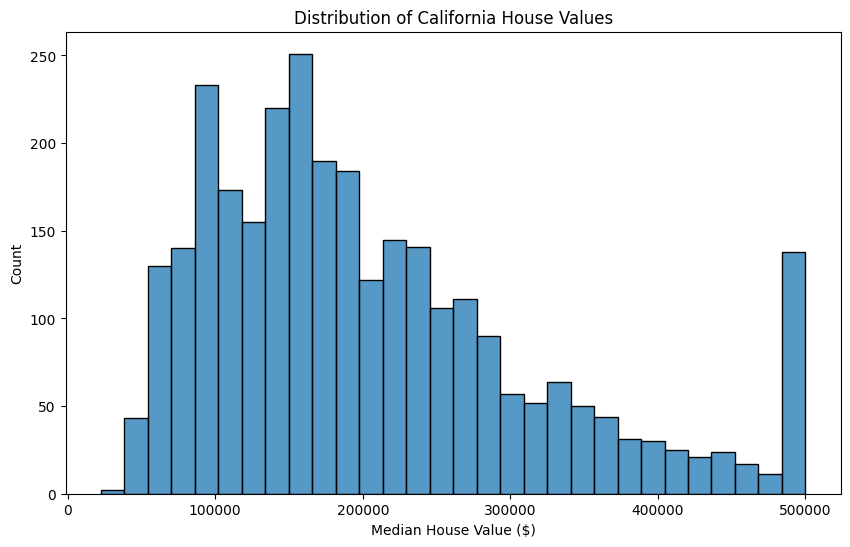


House Value Statistics:
count      3000.00000
mean     205846.27500
std      113119.68747
min       22500.00000
25%      121200.00000
50%      177650.00000
75%      263975.00000
max      500001.00000
Name: median_house_value, dtype: float64


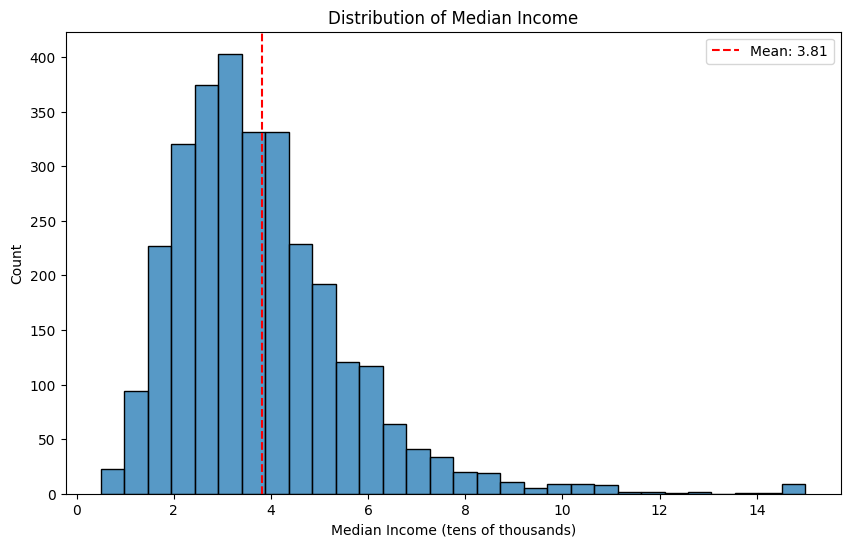


Income Statistics:
Mean Income: $38072.72
Median Income: $34871.50
Standard Deviation: $18545.12


In [8]:
def analyze_house_values(df):
    """
    Create histogram and statistics for house values.

    Parameters
    ----------
    df : pd.DataFrame
        California housing test dataset

    Returns
    -------
    pd.Series
        Descriptive statistics of house values

    Examples
    --------
    >>> test_df = pd.DataFrame({'median_house_value': [100000, 200000, 300000]})
    >>> stats = analyze_house_values(test_df)
    >>> 100000 <= stats['mean'] <= 300000
    True
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='median_house_value', bins=30)
    plt.title('Distribution of California House Values')
    plt.xlabel('Median House Value ($)')
    plt.ylabel('Count')
    plt.show()

    # Calculate statistics
    stats = df['median_house_value'].describe()
    print("\nHouse Value Statistics:")
    print(stats)

    return stats

# Execute analysis
house_value_statistics = analyze_house_values(df)


def plot_income_distribution(df):
    """
    Create histogram of median income distribution.

    Parameters
    ----------
    df : pd.DataFrame
        California housing test dataset

    Returns
    -------
    dict
        Basic statistics of median_income column

    Examples
    --------
    >>> test_df = pd.DataFrame({'median_income': [2.5, 3.0, 3.5]})
    >>> stats = plot_income_distribution(test_df)
    >>> 2.5 <= stats['mean'] <= 3.5
    True
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='median_income', bins=30)
    plt.title('Distribution of Median Income')
    plt.xlabel('Median Income (tens of thousands)')
    plt.ylabel('Count')
    plt.axvline(df['median_income'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["median_income"].mean():.2f}')
    plt.legend()
    plt.show()

    # Calculate statistics
    stats = df['median_income'].describe().to_dict()
    print("\nIncome Statistics:")
    print(f"Mean Income: ${stats['mean']*10000:.2f}")
    print(f"Median Income: ${stats['50%']*10000:.2f}")
    print(f"Standard Deviation: ${stats['std']*10000:.2f}")

    return stats

# Execute analysis
income_stats = plot_income_distribution(df)

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

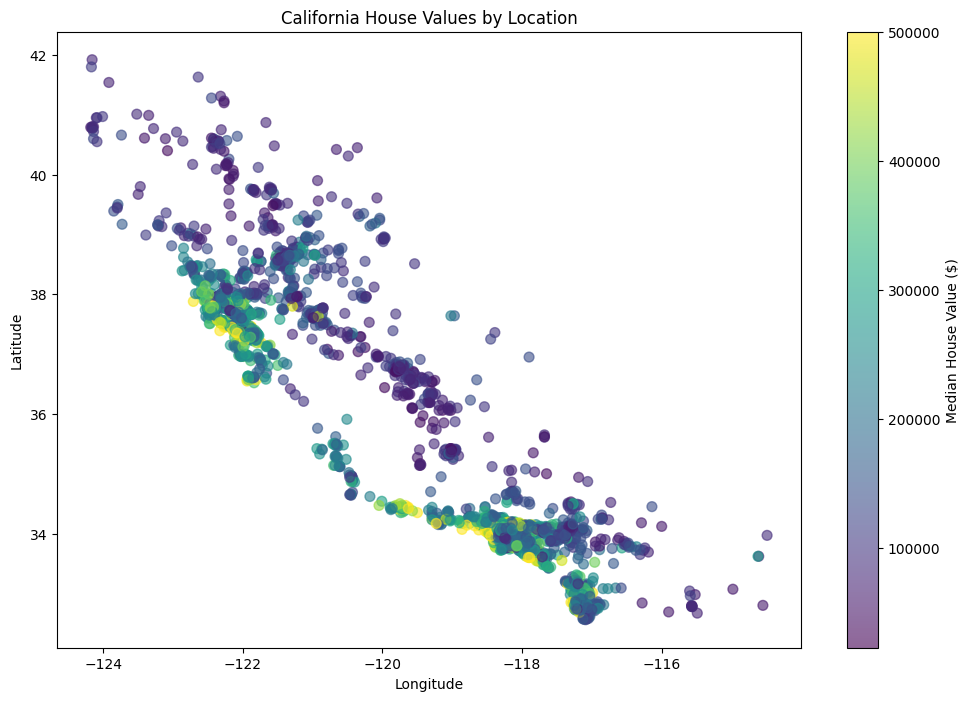


House Value Statistics by Price Category:
                count           mean           std       min       25%  \
price_category                                                           
Low             751.0   87701.864181  20298.090465   22500.0   71300.0   
Medium          749.0  150883.978638  15717.121176  121300.0  137500.0   
High            750.0  217257.733333  24541.582111  177700.0  194500.0   
Very High       750.0  367625.766667  81362.078226  264200.0  293825.0   

                     50%       75%       max  
price_category                                
Low              91300.0  103100.0  121200.0  
Medium          151500.0  163200.0  177600.0  
High            216900.0  238175.0  263900.0  
Very High       347950.0  437400.0  500001.0  


<ipython-input-10-6f94a6bacb0b>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('price_category')['median_house_value'].describe()


In [10]:
def analyze_location_vs_value(df):
    """
    Analyze how house values vary by location in California.

    Parameters
    ----------
    df : pd.DataFrame
        California housing dataset

    Returns
    -------
    pd.DataFrame
        Summary statistics by region
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Create scatter plot of house values by location
    plt.figure(figsize=(12, 8))
    plt.scatter(df['longitude'], df['latitude'],
                c=df['median_house_value'], cmap='viridis',
                s=50, alpha=0.6)
    plt.colorbar(label='Median House Value ($)')
    plt.title('California House Values by Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Calculate regional statistics
    df['price_category'] = pd.qcut(df['median_house_value'],
                                 q=4, labels=['Low', 'Medium', 'High', 'Very High'])

    return df.groupby('price_category')['median_house_value'].describe()

# Run the analysis
location_analysis = analyze_location_vs_value(df)
print("\nHouse Value Statistics by Price Category:")
print(location_analysis)



---



## Submitting Your Work

Submit your work as usual.